Generalize the concept of bias. We will say that a coin has a bias.

The Bayes theorem says:  p(th|y) = p(y|th)*p(th)

#### p(or θ) = represents the bias of the coin (the probability of success)
         p=1: the coin will always land heads
         p=0: the coin will always land tails
         p=0.5: the coin will land half of the time heads and half of the time tails
#### y = represents the total number of heads (number of successes)
#### N = represents the number of tosses

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Define the data

In [ ]:
N=[1,2,4] #numbers of trials
p=[0.25, 0.5, 0.75] #probability of success
x = np.arange(0, 5) # number of successes

Now that we have the data, we need to specify the model. This is done by specifying the likelihood and the prior using probability distributions.

### Choosing the likelihood
#### Assumptions

#### 1) events(coin tosses) are independent

#### 2) two possible outcomes, heads or tails.

A good candidate for the likelihood is the binomial distribution:  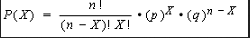

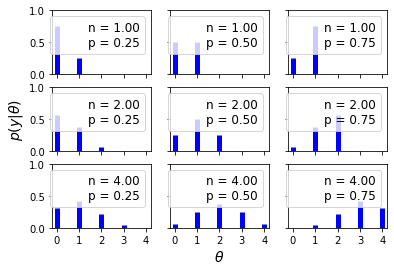

In [8]:
f, ax = plt.subplots(len(p), len(p), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        y = stats.binom(n=N[i], p=p[j]).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='b', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(N[i], p[j]), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$\\theta$', fontsize=14)
ax[1,0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0,0].set_xticks(x)

If we know the p(probability of success) the binomial distribution will tell us the distribution of heads(success). in Bayesian statistics, every time we do not know the value of a parameter, we put a prior on it. The number of p values is infinite in [0,1], so we use a pdf to represent the prior.

###  Choosing the prior
Given the binomial likelihood, a Beta distribution seems a good fit as prior. The reasons are:
<p>1) The beta distribution varies in the range (0,1) the same as the parameter we want to estimate.</p>
<p>2) It adopts several shapes e.g uniform distribution, Gaussian distributions</p>
<p>3) It is the conjugate prior of the binomial distribution.</p>

Text(0, 0.5, '$p(\\theta)$')

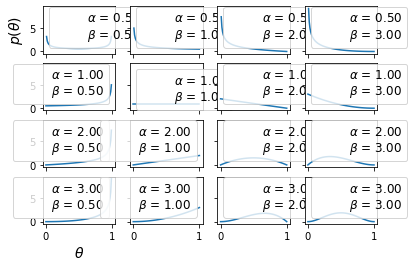

In [2]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[3,0].set_xlabel('$\\theta$', fontsize=14)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14)

#### Computing and plotting the posterior

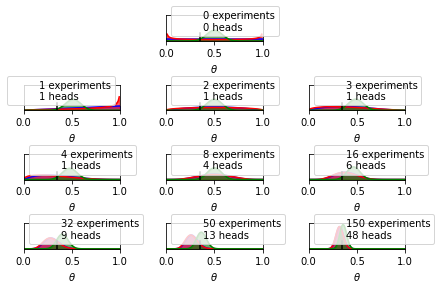

In [3]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$\theta$') 
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()